In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import random

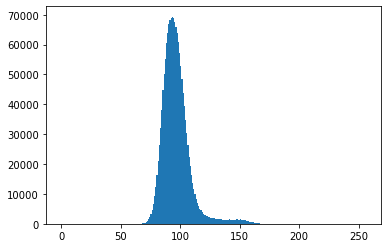

In [10]:
image = cv2.imread("test_bad.png", cv2.IMREAD_GRAYSCALE)
cv2.imshow("sdfsdf ", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.hist(image.ravel(),256,[0,256]); plt.show()
hist = cv2.calcHist([image],[0],None,[256],[0,256])

In [16]:
hist_new = np.linspace(0,0,256)
hist

array([[0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [1.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [1.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [2.000

In [25]:
for i in range(len(hist)): 
    if hist[i]>1:
        print(i)
        break
for i in range(255,0,-1):
    if hist[i]>1:
        print(i)
        break
ymax = 177
ymin = 47

47
177


In [27]:
for i in range(len(hist)):
    hist_new[i] = (hist[i]-ymin)*255/(ymax-ymin)
print(hist_new)

[-9.21923065e+01 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01
 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01
 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01
 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01
 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01
 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01
 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01
 -9.21923065e+01 -9.21923065e+01 -9.02307663e+01 -9.21923065e+01
 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01
 -9.21923065e+01 -9.02307663e+01 -9.21923065e+01 -9.21923065e+01
 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01
 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01 -8.82692337e+01
 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01
 -9.02307663e+01 -9.21923065e+01 -9.21923065e+01 -9.21923065e+01
 -9.21923065e+01 -8.82692337e+01 -8.04230804e+01 -8.63076935e+01
 -7.84615402e+01 -8.04230

In [56]:
sobel = cv2.Sobel(image)
print(sobel.max)

error: OpenCV(4.5.4) :-1: error: (-5:Bad argument) in function 'Sobel'
> Overload resolution failed:
>  - Sobel() missing required argument 'ddepth' (pos 2)
>  - Sobel() missing required argument 'ddepth' (pos 2)


In [53]:
t_lower = int(image.mean()*6/3)  # Lower Threshold
t_upper = int(image.mean()*4/3)  # Upper threshold
# Applying the Canny Edge filter
edge = cv2.Canny(image, t_lower, t_upper)
cv2.imshow("asdasda", edge)
cv2.waitKey(0)
cv2.destroyAllWindows()